# <font color=darkred>Laboratory 16: Matplotlib for Jam! (continued...) </font>

In [1]:
# Preamble script block to identify host, user, and kernel
import sys
! hostname
! whoami
print(sys.executable)
print(sys.version)
print(sys.version_info)

Jonah_laptop
jonah_laptop\jonah
C:\Users\JONAH\anaconda3\python.exe
3.11.4 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 13:38:37) [MSC v.1916 64 bit (AMD64)]
sys.version_info(major=3, minor=11, micro=4, releaselevel='final', serial=0)


## Full name: Jonah Jordan
## R#: 11886590
## Title of the notebook: lab 16
## Date: 10/11
___

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

![](https://matplotlib.org/1.4.2/mpl_examples/api/logo2.hires.png) <br>

___
### <font color=purple>Line Charts</font>

A line chart or line plot or line graph or curve chart is a type of chart which displays information as a series of data points called 'markers' connected by straight line segments.

It is a basic type of chart common in many fields. It is similar to a scatter plot (below) except that the measurement points are **ordered** (typically by their x-axis value) and joined with straight line segments. 

A line chart is often used to visualize a trend in data over intervals of time – a time series – thus the line is often drawn chronologically. 

The x-axis spacing is sometimes tricky, hence line charts can unintentionally decieve - so be careful that it is the appropriate chart for your application.  

___
### Example- Speed vs Time

Consider the experimental data below

|Elapsed Time (s)|Speed (m/s)|
|---:|---:|
|0 |0|
|1.0 |3|
|2.0 |7|
|3.0 |12|
|4.0 |20|
|5.0 |30|
|6.0 | 45.6| 

Show the relationship between time and speed.  Is the relationship indicating acceleration? How much?

In [8]:
# Create two lists; time  and speed.
time = [0,1.0,2.0,3.0,4.0,5.0,6.0]
speed = [0,3,7,12,20,30,45.6]

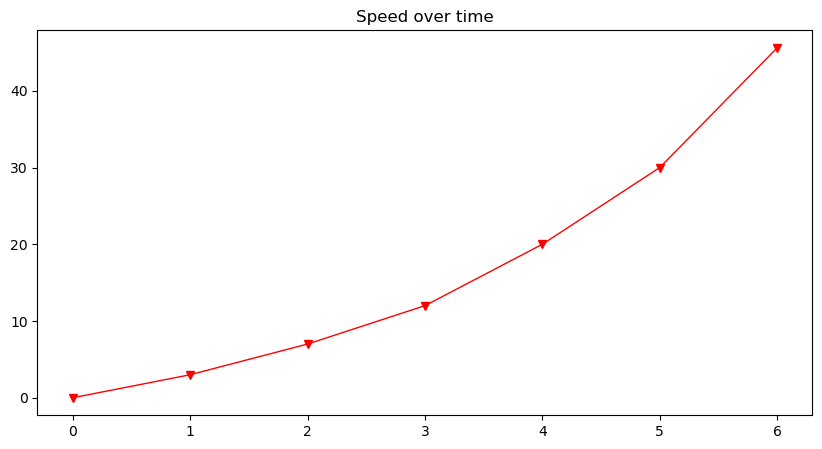

In [9]:
# Create a line chart of speed on y axis and time on x axis
mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
plt.plot(time, speed, c='red', marker='v',linewidth=1) # basic line plot
plt.title("Speed over time")
plt.show()

From examination of  the plot, estimate the speed at time t = 5.0 (eyeball estimate)

<hr>

### Example- Add a linear fit
Using the same series from Exercise 1, Plot the speed vs time (speed on y-axis, time on x-axis) using a line plot. Plot a second line based on the linear model 

$$y = mx + b$$, 

where $$b=0~\text{and}~m=7.6$$.


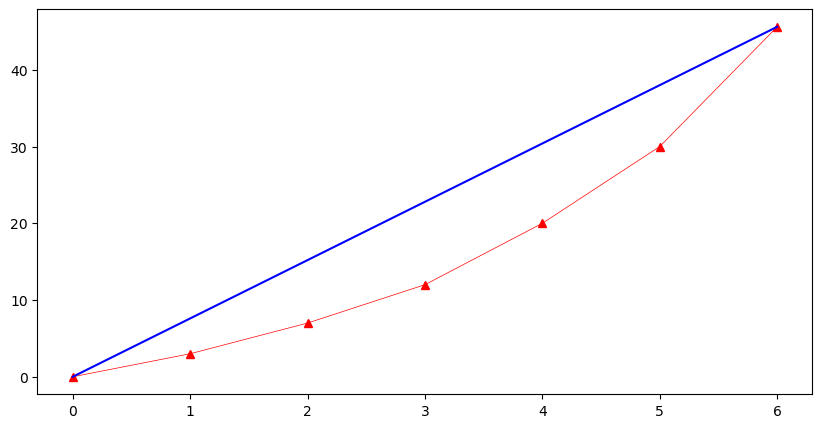

In [10]:
# Code and run your solution here:
def ymodel(xmodel,slope,intercept):
    ymodel = slope*xmodel+intercept
    return(ymodel)

yseries = []
slope = 7.6
intercept = 0.0

for i in range(0,len(time)):
    yseries.append(ymodel(time[i],slope,intercept))
    
# Create a markers only line chart
mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
plt.plot(time, speed, c='red', marker='^',linewidth=0.5) # basic line plot
plt.plot(time, yseries, c='blue') 
plt.show()

<hr>

### Example- Find a better fit
Using trial and error try to improve the 'fit' of the model, by adjusting values of $$m~\text{and}~b$$.

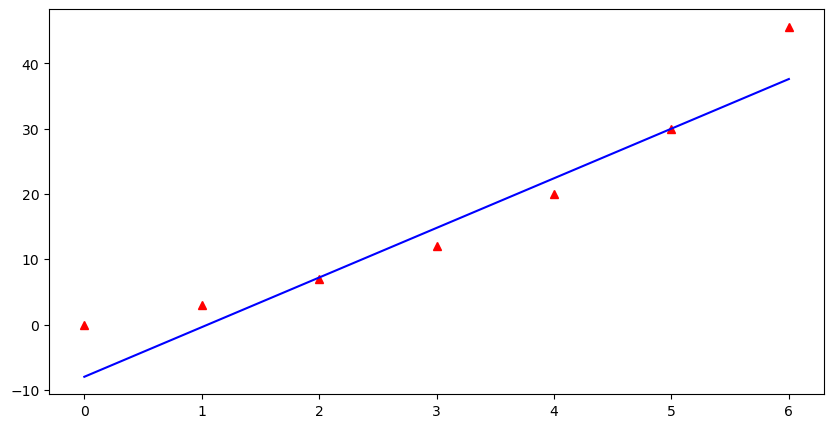

In [11]:
# Code and run your solution here:
yseries = []
slope = 7.6
intercept = -8.0

for i in range(0,len(time)):
    yseries.append(ymodel(time[i],slope,intercept))

# Create a markers only line chart
mydata = plt.figure(figsize = (10,5)) # build a square drawing canvass from figure class
plt.plot(time, speed, c='red', marker='^',linewidth=0) # basic scatter plot
plt.plot(time, yseries, c='blue') 
plt.show()

___
### <font color=purple>Scatter Plots</font>
 
A scatter plot (also called a scatterplot, scatter graph, scatter chart, scattergram, or scatter diagram) is a type of plot or mathematical diagram using Cartesian coordinates to display values for typically two variables for a set of data. If the points are coded (color/shape/size), one additional variable can be displayed. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis.

A scatter plot can be used either when one continuous variable that is under the control of the experimenter and the other depends on it or when both continuous variables are independent. If a parameter exists that is systematically incremented and/or decremented by the other, it is called the control parameter or independent variable and is customarily plotted along the horizontal axis. The measured or dependent variable is customarily plotted along the vertical axis. If no dependent variable exists, either type of variable can be plotted on either axis and a scatter plot will illustrate only the degree of correlation (not causation) between two variables.

A scatter plot can suggest various kinds of correlations between variables with a certain confidence interval. For example, weight and height, weight would be on y axis and height would be on the x axis. 
Correlations may be positive (rising), negative (falling), or null (uncorrelated). 
If the pattern of dots slopes from lower left to upper right, it indicates a positive correlation between the variables being studied. 
If the pattern of dots slopes from upper left to lower right, it indicates a negative correlation. 

A line of best fit (alternatively called 'trendline') can be drawn in order to study the relationship between the variables. An equation for the correlation between the variables can be determined by established best-fit procedures. For a linear correlation, the best-fit procedure is known as linear regression and is guaranteed to generate a correct solution in a finite time. No universal best-fit procedure is guaranteed to generate a  solution for arbitrary relationships. 
A scatter plot is also very useful when we wish to see how two comparable data sets agree and to show nonlinear relationships between variables.

Furthermore, if the data are represented by a mixture model of simple relationships, these relationships will be visually evident as superimposed patterns.

Scatter charts can be built in the form of bubble, marker, or/and line charts.

Much of the above is verbatim/adapted from: https://en.wikipedia.org/wiki/Scatter_plot

___ 
### Example- Examine the dataset with heights of fathers, mothers and sons

In [12]:
df = pd.read_csv('galton_subset.csv')
df['child']= df['son'] ; df.drop('son', axis=1, inplace = True) # rename son to child - got to imagine there are some daughters
df.head()

,father,mother,child
0,78.5,67.0,73.2
1,75.5,66.5,73.5
2,75.0,64.0,71.0
3,75.0,64.0,70.5
4,75.0,58.5,72.0


In [13]:
# build some lists
dad = df['father'] ; mom = df['mother'] ; son = df['child']

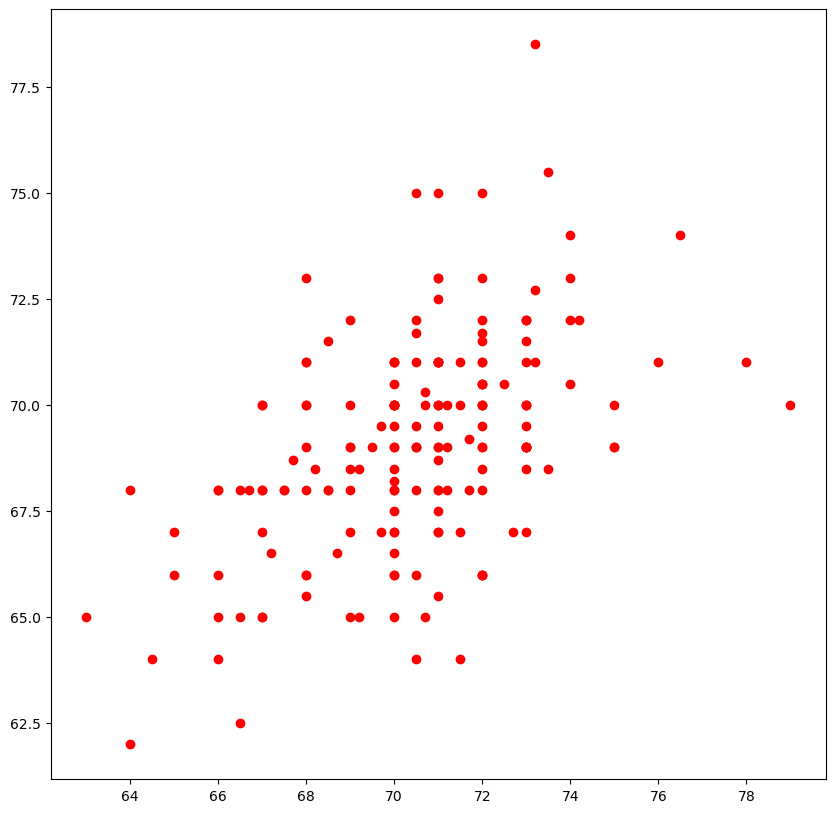

In [14]:
myfamily = plt.figure(figsize = (10, 10)) # build a square drawing canvass from figure class
plt.scatter(son, dad, c='red') # basic scatter plot
plt.show()

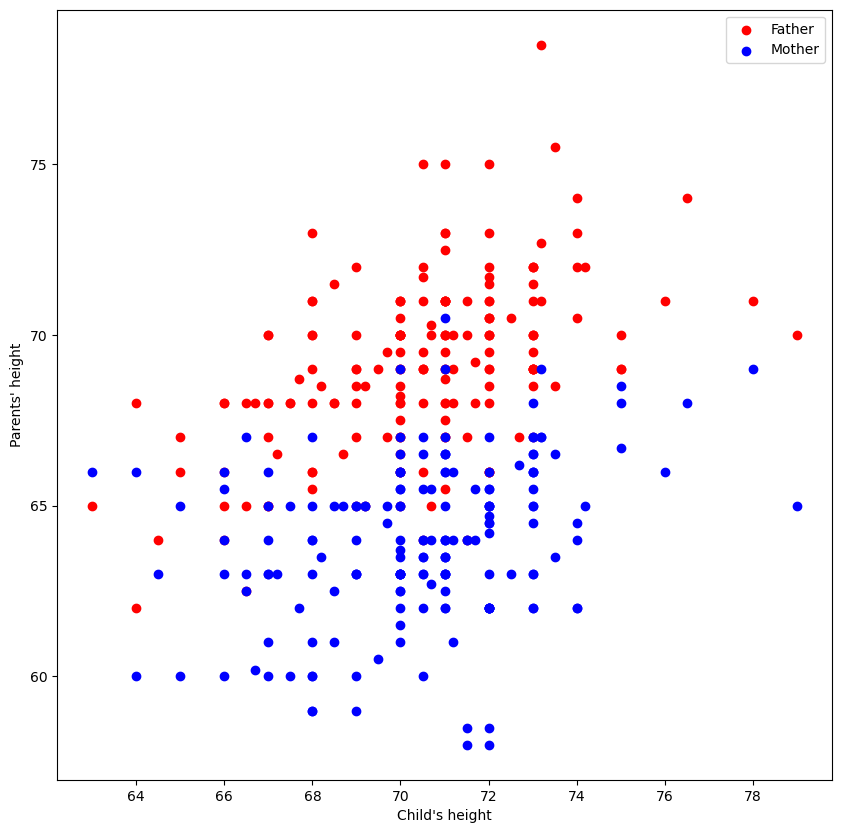

In [15]:
# Looks lousy, needs some labels
myfamily = plt.figure(figsize = (10, 10)) # build a square drawing canvass from figure class
plt.scatter(son, dad, c='red' , label='Father') # one plot series
plt.scatter(son, mom, c='blue', label='Mother') # two plot series
plt.xlabel("Child's height")
plt.ylabel("Parents' height")
plt.legend()
plt.show() # render the two plots

<Axes: xlabel='child', ylabel='father'>

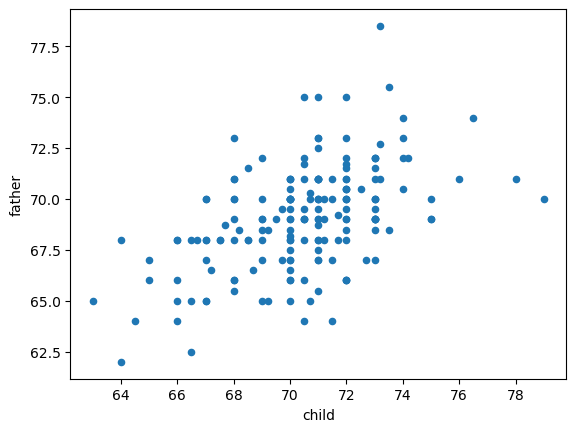

In [16]:
# Repeat in pandas - The dataframe already is built
df.plot.scatter(x="child", y="father")

Text(0, 0.5, "Parents' Height")

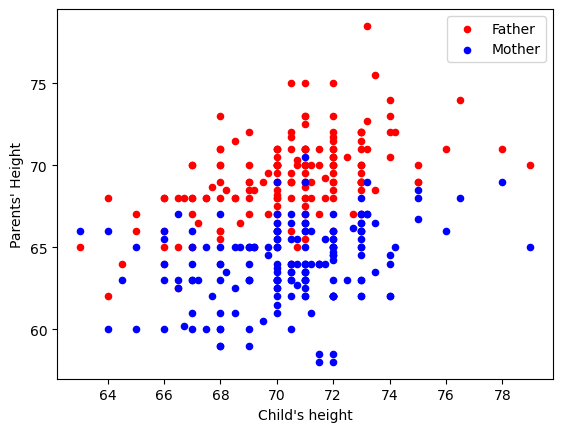

In [17]:
ax = df.plot.scatter(x="child", y="father", c="red", label='Father')
df.plot.scatter(x="child", y="mother", c="blue", label='Mother', ax=ax)

ax.set_xlabel("Child's height")
ax.set_ylabel("Parents' Height")

___
### <font color=purple>Histograms</font>
 

Quoting from https://en.wikipedia.org/wiki/Histogram

"A histogram is an approximate representation of the distribution of numerical data. It was first introduced by Karl Pearson.[1] To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable. The bins (intervals) must be adjacent, and are often (but not required to be) of equal size.

If the bins are of equal size, a rectangle is erected over the bin with height proportional to the frequency—the number of cases in each bin. A histogram may also be normalized to display "relative" frequencies. It then shows the proportion of cases that fall into each of several categories, with the sum of the heights equaling 1.

However, bins need not be of equal width; in that case, the erected rectangle is defined to have its area proportional to the frequency of cases in the bin. The vertical axis is then not the frequency but frequency density—the number of cases per unit of the variable on the horizontal axis. Examples of variable bin width are displayed on Census bureau data below.

As the adjacent bins leave no gaps, the rectangles of a histogram touch each other to indicate that the original variable is continuous.

Histograms give a rough sense of the density of the underlying distribution of the data, and often for density estimation: estimating the probability density function of the underlying variable. The total area of a histogram used for probability density is always normalized to 1. If the length of the intervals on the x-axis are all 1, then a histogram is identical to a relative frequency plot.

A histogram can be thought of as a simplistic kernel density estimation, which uses a kernel to smooth frequencies over the bins. This yields a smoother probability density function, which will in general more accurately reflect distribution of the underlying variable. The density estimate could be plotted as an alternative to the histogram, and is usually drawn as a curve rather than a set of boxes. Histograms are nevertheless preferred in applications, when their statistical properties need to be modeled. The correlated variation of a kernel density estimate is very difficult to describe mathematically, while it is simple for a histogram where each bin varies independently.

An alternative to kernel density estimation is the average shifted histogram, which is fast to compute and gives a smooth curve estimate of the density without using kernels.

The histogram is one of the seven basic tools of quality control.

Histograms are sometimes confused with bar charts. A histogram is used for continuous data, where the bins represent ranges of data, while a bar chart is a plot of categorical variables. Some authors recommend that bar charts have gaps between the rectangles to clarify the distinction."

___
### Example- Explore the "top_movies" dataset and draw histograms for Gross and Year.

In [18]:
import pandas as pd

df = pd.read_csv('top_movies.csv')
df.head()

,Title,Studio,Gross,Gross (Adjusted),Year
0,Star Wars: The Force Awakens,Buena Vista (Disney),906723418,906723400,2015
1,Avatar,Fox,760507625,846120800,2009
2,Titanic,Paramount,658672302,1178627900,1997
3,Jurassic World,Universal,652270625,687728000,2015
4,Marvel's The Avengers,Buena Vista (Disney),623357910,668866600,2012


array([[<Axes: title={'center': 'Gross'}>]], dtype=object)

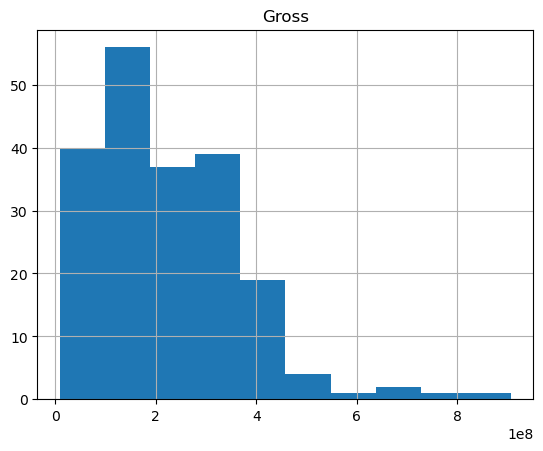

In [19]:
df[["Gross"]].hist()

array([[<Axes: title={'center': 'Year'}>]], dtype=object)

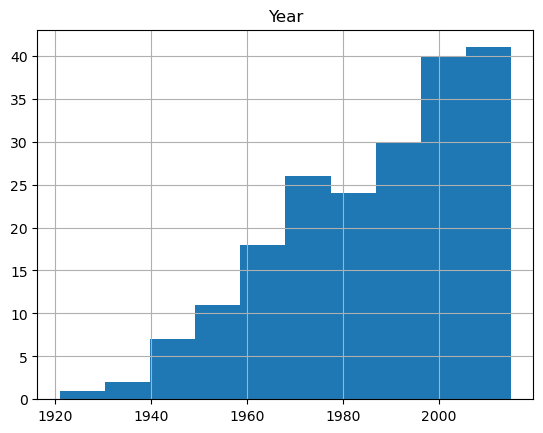

In [20]:
df[["Year"]].hist()

array([[<Axes: title={'center': 'Gross'}>]], dtype=object)

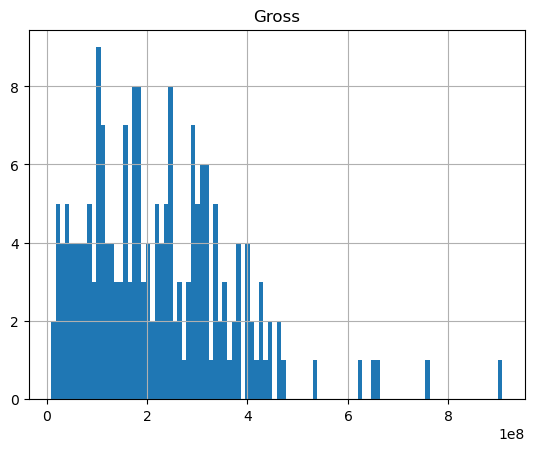

In [21]:
df[["Gross"]].hist(bins=100)

___
## <font color=orange>This is a Matplotlib Cheat Sheet</font>

![](https://www.googleapis.com/download/storage/v1/b/kaggle-forum-message-attachments/o/inbox%2F5337747%2Fc6a59a0fad73ea9fc11720757f81cf13%2FMatplotlib_cheatsheet_datacamp.png?generation=1598960608599353&alt=media)


___
![](https://media2.giphy.com/media/5nj4ZZWl6QwneEaBX4/source.gif) <br>

*Here are some of the resources used for creating this notebook:* 

- __"Discrete distribution as horizontal bar chart"__ available at *https://matplotlib.org/stable/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html<br>
- __"Bar Plot in Matplotlib"__ available at *https://www.geeksforgeeks.org/bar-plot-in-matplotlib/<br>


*Here are some great reads on this topic:* 
- __"Python | Introduction to Matplotlib"__ available at *https://www.geeksforgeeks.org/python-introduction-matplotlib/<br>
- __"Visualization with Matplotlib"__ available at *https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html <br>
- __"Introduction to Matplotlib — Data Visualization in Python"__ by __Ehi Aigiomawu__ available at *https://heartbeat.fritz.ai/introduction-to-matplotlib-data-visualization-in-python-d9143287ae39 <br>
- __"Python Plotting With Matplotlib (Guide)"__ by __Brad Solomon__ available at *https://realpython.com/python-matplotlib-guide/ <br>


*Here are some great videos on these topics:* 
- __"Matplotlib Tutorial (Part 1): Creating and Customizing Our First Plots"__ by __Corey Schafer__ available at *https://www.youtube.com/watch?v=UO98lJQ3QGI <br>
- __"Intro to Data Analysis / Visualization with Python, Matplotlib and Pandas | Matplotlib Tutorial"__ by __CS Dojo__ available at *https://www.youtube.com/watch?v=a9UrKTVEeZA <br>
- __"Intro to Data Visualization in Python with Matplotlib! (line graph, bar chart, title, labels, size)"__ by __Keith Galli__ available at *https://www.youtube.com/watch?v=DAQNHzOcO5A <br>


___
![](https://media.csesoc.org.au/content/images/2019/10/learn11.gif) <br>


## Exercise: Half as romantic!  <br>

### Plot the whole heart first and then Rewrite the code to only display the figure for positive x values. Do not forget to decorate the figure with a title and labels.

#### * Make sure to cite any resources that you may use. 

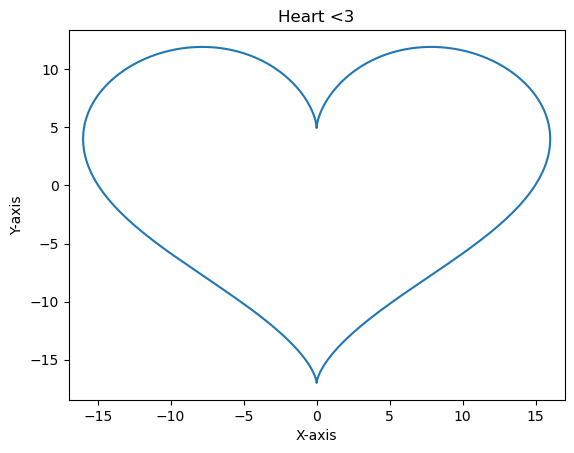

In [31]:
%reset -f 
from matplotlib import pyplot as plt # import the plotting library 
import numpy as np # import NumPy: for large, multi-dimensional arrays and matrices, along with  high-level mathematical functions to operate on these arrays.

pi = np.pi #pi value from the np package

t= np.linspace(0,2*pi,360)# the NumPy function np.linspace is similar to the range()

x = 16*np.sin(t)**3
y = 13*np.cos(t) - 5*np.cos(2*t) - 2*np.cos(3*t) - np.cos(4*t)

# hint:
xMin = -16.99
xMax = 16.99

# do the plotting here...
plt.plot(x, y)
# add a label to the x and y-axes
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# limit visible x axis
plt.xlim(xMin, xMax)
# add a title
plt.title('Heart <3')

# display the plot
plt.show()

In [27]:
np.min(x)
np.max(x)

15.999540529906817

ValueError: invalid literal for int() with base 10: 'a'

![](https://i.pinimg.com/originals/ee/62/06/ee62064e595a225f476e47cf39b9a05d.jpg)

In [56]:

user_input = input("Enter an integer: ")
num = int(user_input)
if num % 2 == 0:
        print(f"{num} is an even number.")
else:
        print(f"{num} is an odd number.")
    

Enter an integer: 4
4 is an even number.
